# Importing all necessary libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [81]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.multiclass import OneVsRestClassifier

from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

# Load and check data

In [82]:
red_wine_quality = pd.read_csv('data/winequality-red.csv', sep=';')

In [83]:
red_wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [84]:
red_wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [85]:
red_wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Checking for unwanted objects by type: "?, 0"

In [86]:
for col in red_wine_quality.columns:
    print('{} : {}'.format(col,red_wine_quality[col].unique()))

fixed acidity : [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
volatile acidity : [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0

# Data visualisation

In [87]:
red_wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

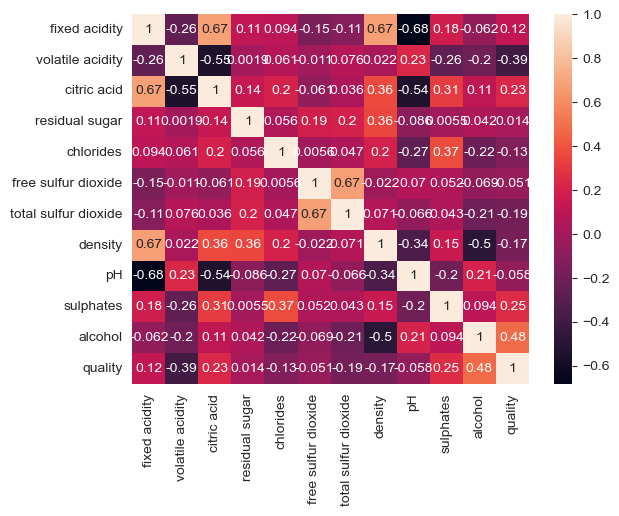

In [88]:
sns.heatmap(red_wine_quality.corr(), annot=True)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

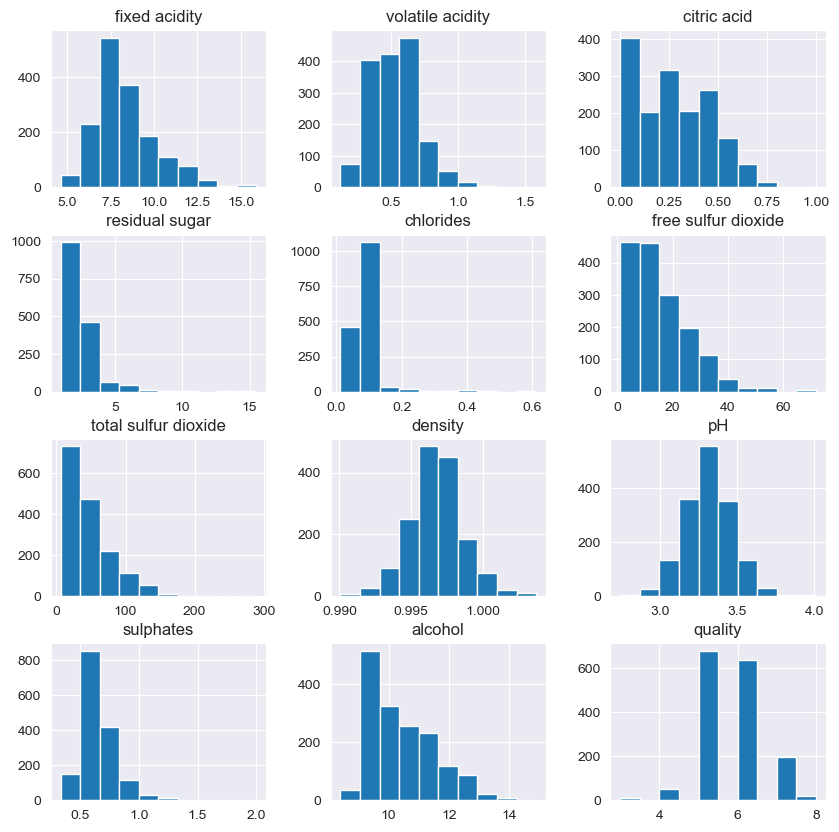

In [89]:
red_wine_quality.hist(figsize=(10, 10))

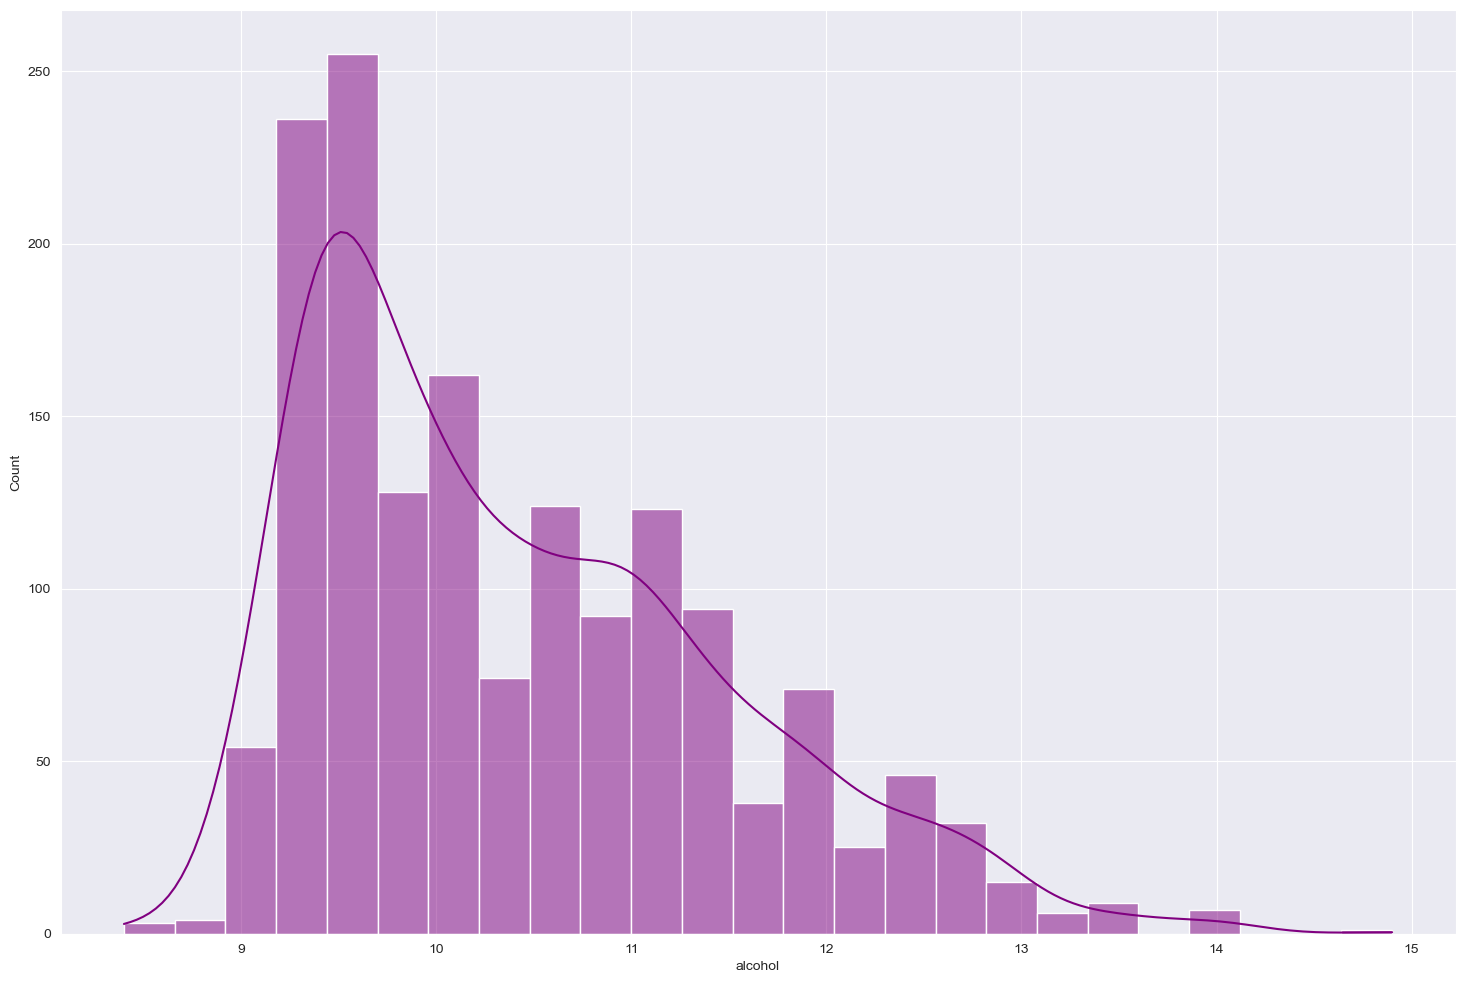

In [90]:
ax = plt.subplots(figsize = (18,12))
ax = sns.histplot(x = red_wine_quality['alcohol'], bins = 25, color = 'purple', kde = True)

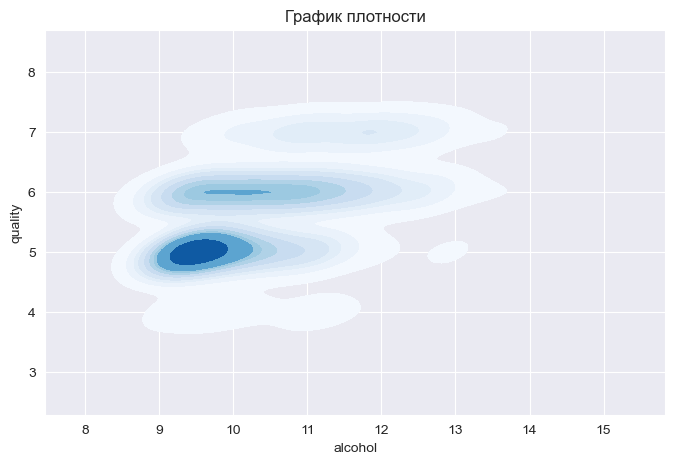

In [91]:
plt.figure(figsize=(8, 5))
sns.kdeplot(x=red_wine_quality["alcohol"], y=red_wine_quality["quality"], cmap="Blues", fill=True)
plt.title("График плотности")
plt.show()


<Figure size 1200x800 with 0 Axes>

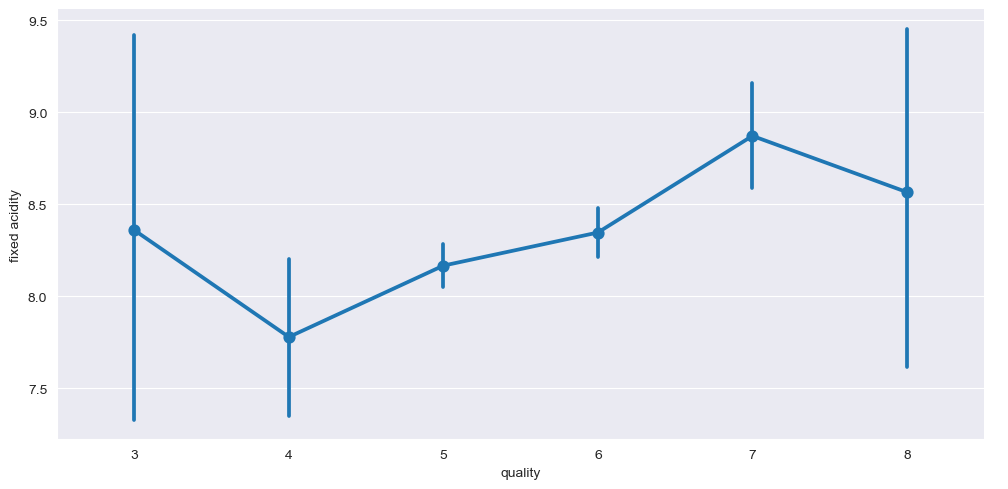

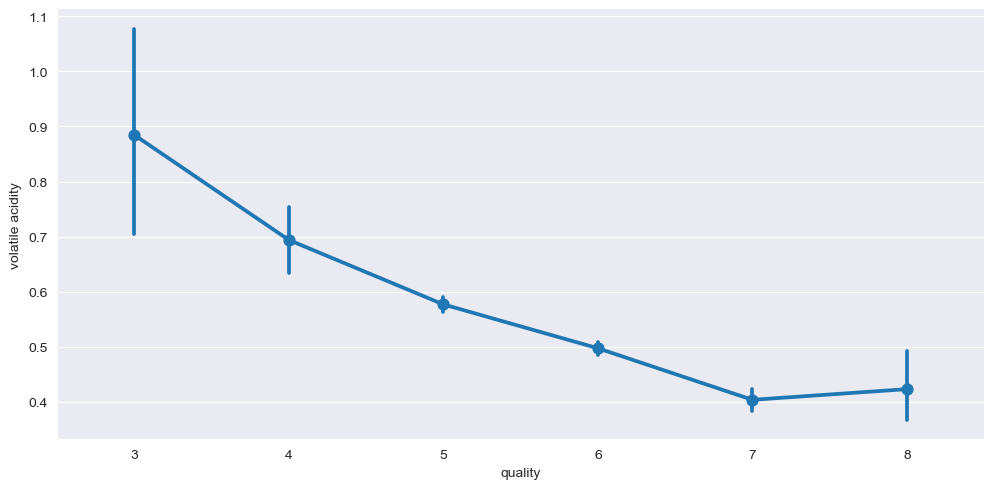

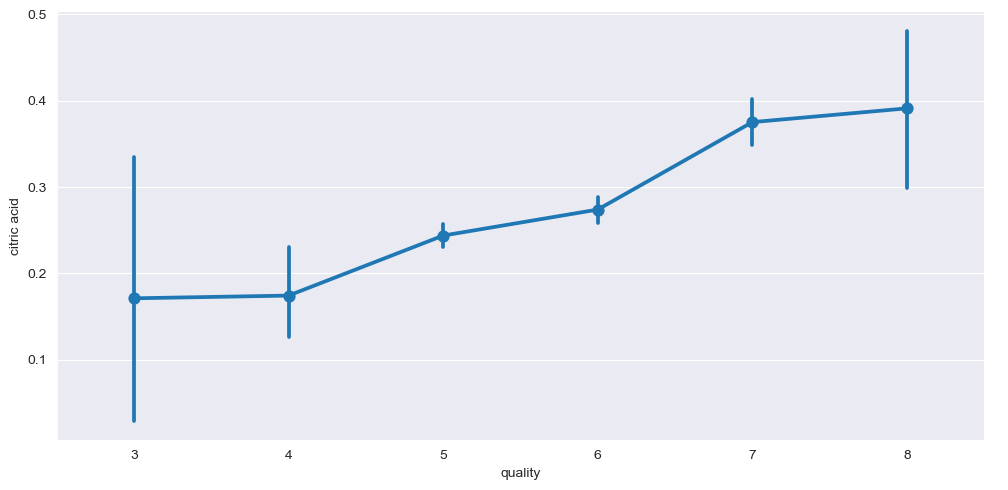

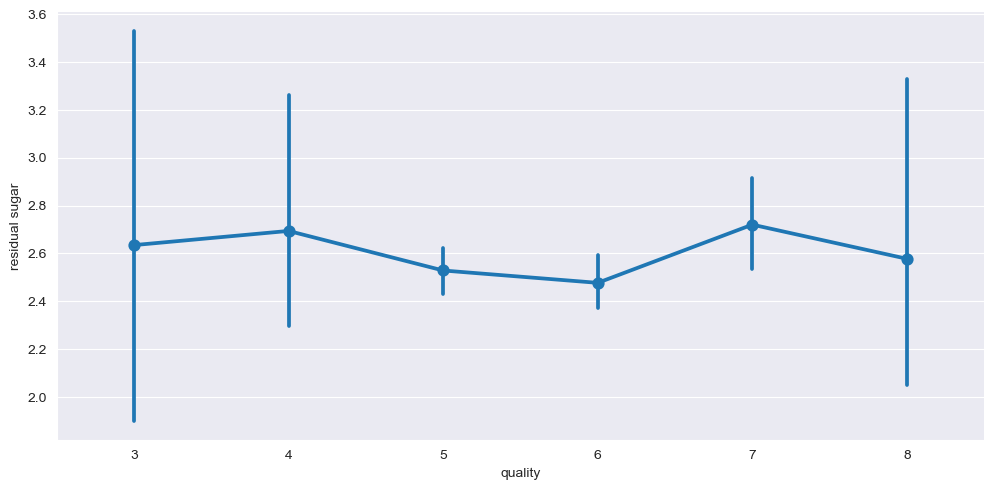

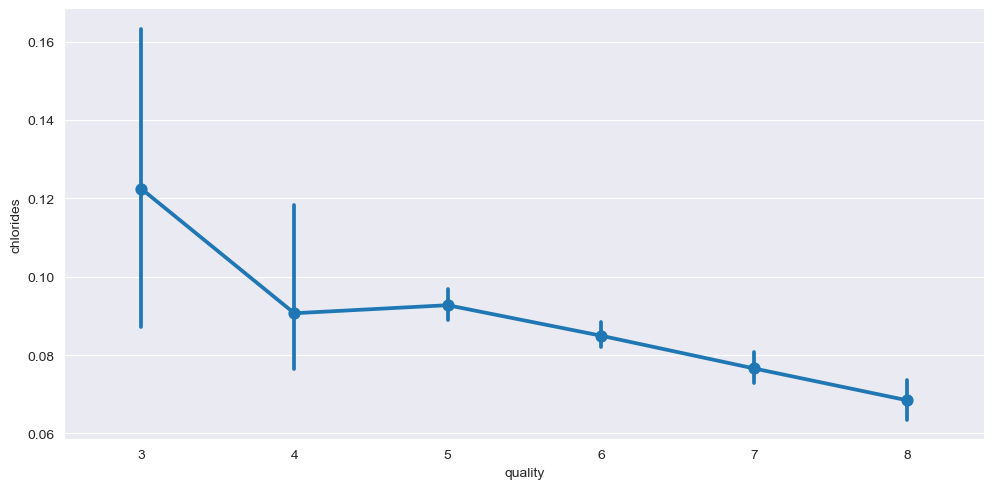

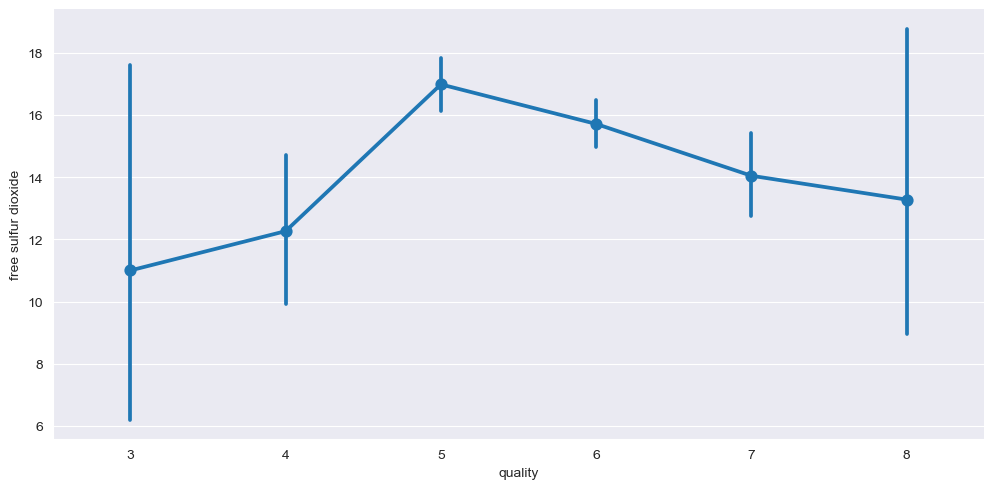

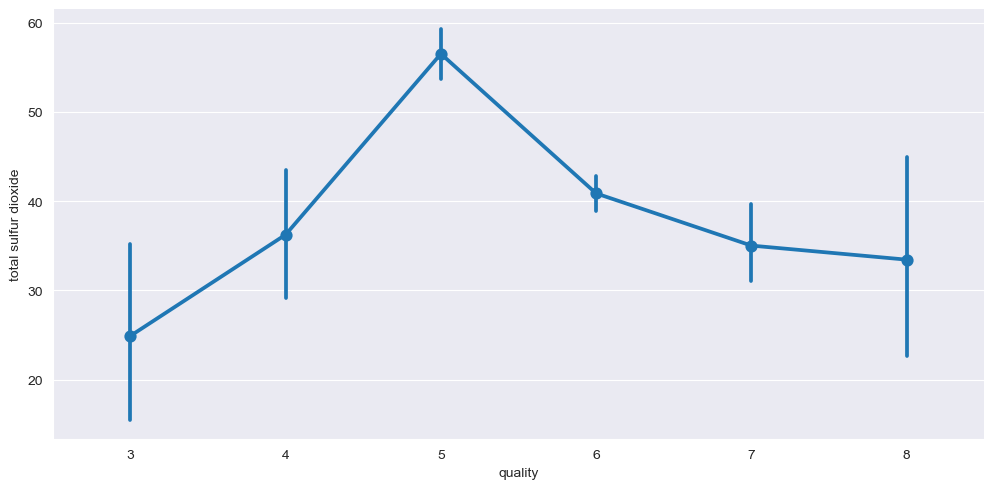

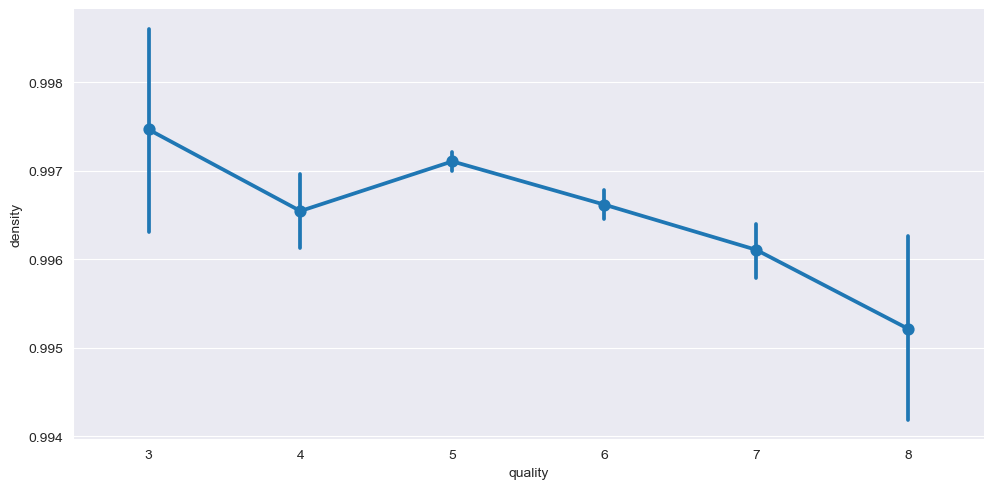

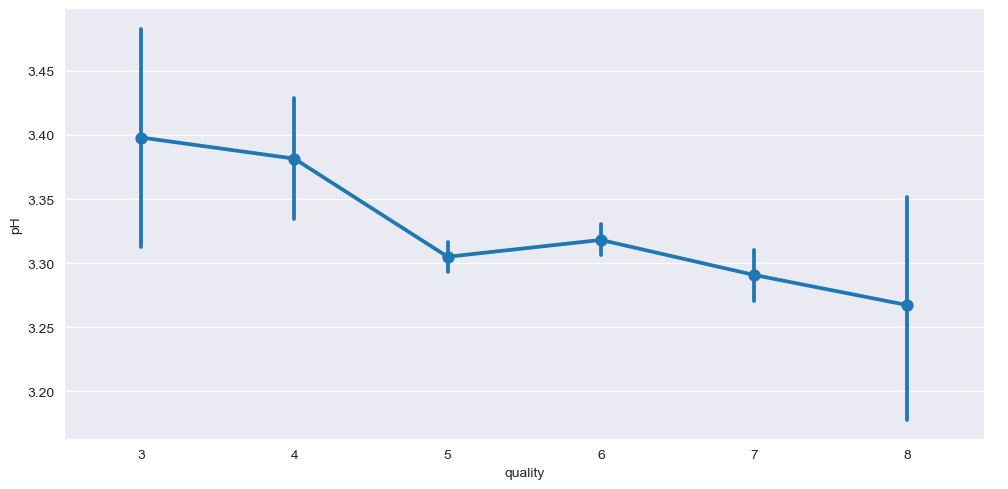

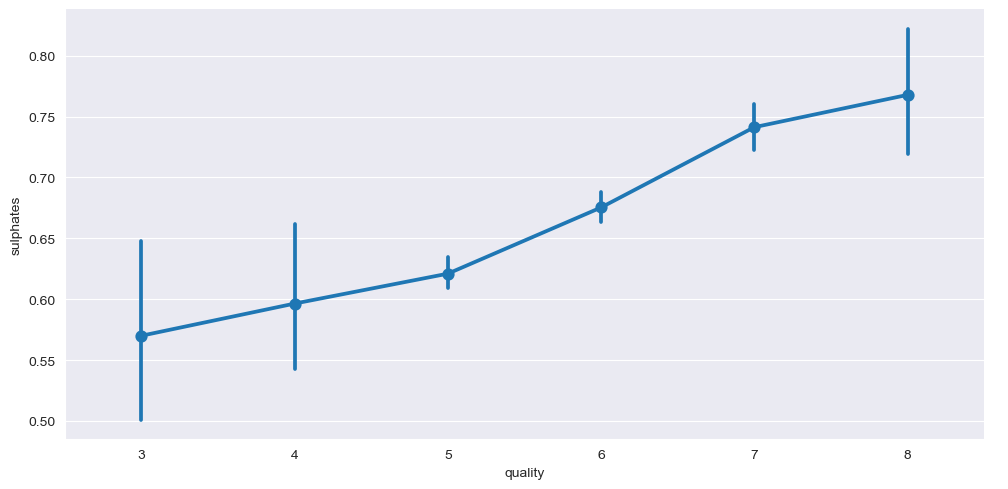

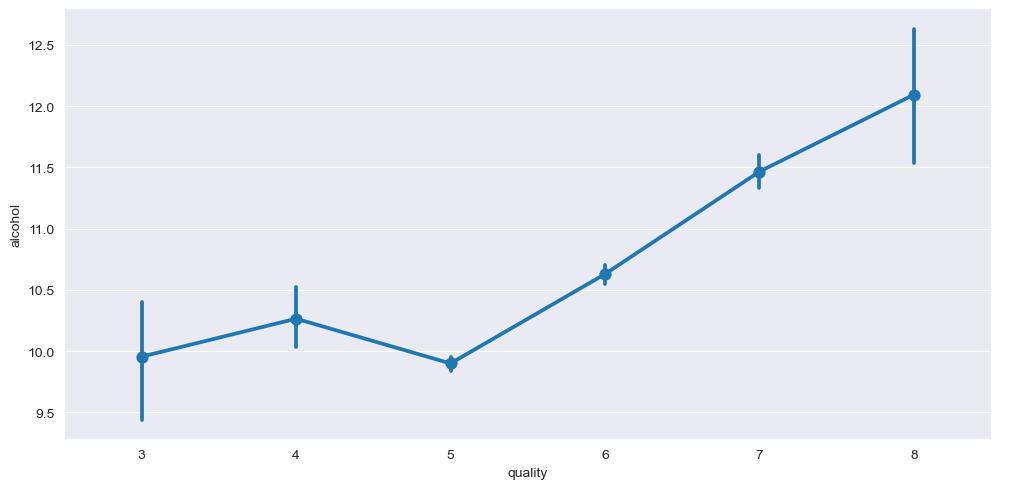

In [92]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(red_wine_quality.columns[:-1]):
    sns.catplot(data = red_wine_quality, y=col, x="quality", kind='point', aspect=2)

plt.tight_layout()
plt.show()

<Axes: xlabel='chlorides', ylabel='fixed acidity'>

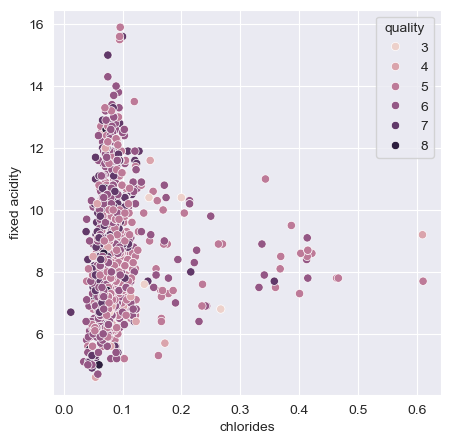

In [93]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = red_wine_quality["chlorides"], y = red_wine_quality["fixed acidity"], hue = red_wine_quality["quality"])

<Axes: xlabel='density', ylabel='residual sugar'>

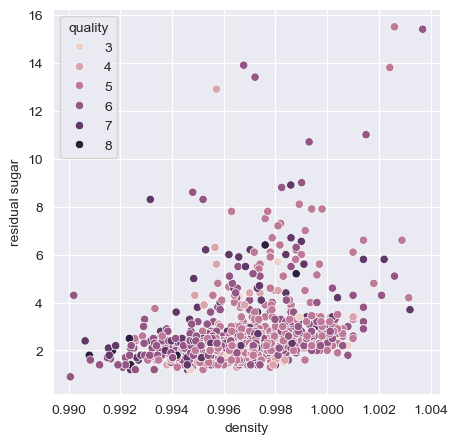

In [94]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = red_wine_quality["density"], y = red_wine_quality["residual sugar"], hue = red_wine_quality["quality"])


In [95]:
red_wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Preparing data

In [96]:
y_data = red_wine_quality[['quality']]

In [97]:
X_data = red_wine_quality.drop('quality', axis = 1)

In [98]:
X_data, y_data = X_data.sample(frac = 1, replace = True), y_data.sample(frac = 1, replace = True)

In [99]:
def split_and_normalize_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)
    scaler = StandardScaler()

    #X_train_scaled = scaler.fit_transform(X_train)
    #X_test_scaled = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [100]:
X_train, X_test, y_train, y_test = split_and_normalize_data(X_data, y_data)

# Different models testing

In [101]:
regressor = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

grid_search = GridSearchCV(regressor, param_grid, n_jobs = -1, cv = 5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [102]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [103]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(rmse):.4f}")

R² (коэффициент детерминации): 0.0026
MAE (средняя абсолютная ошибка): 0.7025
MSE (среднеквадратичная ошибка): 0.7078
RMSE (корень из MSE): 0.8413


In [104]:
tree_regressor = DecisionTreeRegressor()

param_grid = {
    "criterion":('squared_error', 'friedman_mse', 'poisson', 'absolute_error'),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

grid_search = GridSearchCV(tree_regressor, param_grid, n_jobs = -1, cv = 5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ('squared_error', 'friedman_mse',
                                       'poisson', 'absolute_error'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='r2')

In [105]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [106]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(rmse):.4f}")

R² (коэффициент детерминации): -0.0048
MAE (средняя абсолютная ошибка): 0.7065
MSE (среднеквадратичная ошибка): 0.7130
RMSE (корень из MSE): 0.8444


In [107]:
random_forest_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': list(range(1, 20)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': list(range(1, 20, 2)),
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(random_forest_regressor, param_grid, n_jobs = -1, cv = 5, scoring='r2')
grid_search.fit(X_train, y_train)

C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              19],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [108]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [109]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(rmse):.4f}")

R² (коэффициент детерминации): -0.0027
MAE (средняя абсолютная ошибка): 0.7050
MSE (среднеквадратичная ошибка): 0.7115
RMSE (корень из MSE): 0.8435


In [110]:
ovr = OneVsRestClassifier(
    CatBoostClassifier(
        iterations = 500,
        objective = 'MultiClassOneVsAll',
        l2_leaf_reg = 5,
        random_seed = 52,
        thread_count = 1,
        verbose = 0,
        learning_rate = 0.01,
        depth = 8
    )
)

ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x0000017F8BF6C740>)

In [111]:
y_pred = ovr.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.41      0.61      0.49        95
           6       0.48      0.49      0.49        97
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00         4

    accuracy                           0.44       240
   macro avg       0.15      0.18      0.16       240
weighted avg       0.36      0.44      0.39       240



C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [113]:
cbc_score = accuracy_score(y_test, y_pred)

print(f"точность: {cbc_score:.4f}")

точность: 0.4417


In [114]:
catboost_regressor = CatBoostRegressor()

param_grid = {
    'iterations': [200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': list(range(1, 10)),
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
}

grid_search = GridSearchCV(catboost_regressor, param_grid, n_jobs = -1, cv = 5, scoring='r2')
grid_search.fit(X_train, y_train)

0:	learn: 0.8073521	total: 502us	remaining: 99.9ms
1:	learn: 0.8073394	total: 1.1ms	remaining: 109ms
2:	learn: 0.8072833	total: 1.44ms	remaining: 94.5ms
3:	learn: 0.8072447	total: 1.8ms	remaining: 88.1ms
4:	learn: 0.8072399	total: 2.14ms	remaining: 83.6ms
5:	learn: 0.8071921	total: 2.45ms	remaining: 79.2ms
6:	learn: 0.8071820	total: 2.77ms	remaining: 76.4ms
7:	learn: 0.8071667	total: 3.1ms	remaining: 74.3ms
8:	learn: 0.8071357	total: 3.4ms	remaining: 72.3ms
9:	learn: 0.8070808	total: 3.71ms	remaining: 70.5ms
10:	learn: 0.8070266	total: 4.04ms	remaining: 69.4ms
11:	learn: 0.8070028	total: 4.38ms	remaining: 68.6ms
12:	learn: 0.8069494	total: 4.71ms	remaining: 67.8ms
13:	learn: 0.8069343	total: 5.08ms	remaining: 67.4ms
14:	learn: 0.8068974	total: 5.43ms	remaining: 67ms
15:	learn: 0.8068706	total: 5.76ms	remaining: 66.2ms
16:	learn: 0.8068289	total: 6.09ms	remaining: 65.6ms
17:	learn: 0.8067762	total: 6.44ms	remaining: 65.1ms
18:	learn: 0.8067242	total: 6.8ms	remaining: 64.8ms
19:	learn: 0

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000017F8A501130>,
             n_jobs=-1,
             param_grid={'border_count': [32, 64, 128],
                         'depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'iterations': [200, 500], 'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2')

In [115]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [116]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(rmse):.4f}")

R² (коэффициент детерминации): 0.0002
MAE (средняя абсолютная ошибка): 0.7051
MSE (среднеквадратичная ошибка): 0.7094
RMSE (корень из MSE): 0.8423


In [119]:
random_forest_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': list(range(1, 20)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': list(range(0, 20, 2)),
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(random_forest_classifier, param_grid, n_jobs = -1, cv = 5, scoring='r2')
grid_search.fit(X_train, y_train)

C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1710 fits failed out of a total of 17100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1710 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\gosha\miniconda3\Lib\si

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [0, 2, 4, 6, 8, 10, 12, 14, 16,
                                              18],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [120]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.43      0.58      0.49        95
           6       0.46      0.53      0.49        97
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00         4

    accuracy                           0.44       240
   macro avg       0.15      0.18      0.16       240
weighted avg       0.35      0.44      0.39       240



C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [122]:
rfc_score = accuracy_score(y_test, y_pred)
print(f"точность: {rfc_score:.4f}")

точность: 0.4417
